In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [39]:
df = pd.read_csv('train.csv')

In [40]:
#Antes de mudar formatos

# SEATS __________________________________________________
# Check for model cars with missing values in the 'seats' column
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

# Update number of seats based on conditions
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

# Check
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

# FUEL TYPE __________________________________________________
# unique 'fuel_type'
valores_unicos_fuel_type = df['fuel_type'].unique()
print()
print(valores_unicos_fuel_type)

# KMS __________________________________________________
#remove kms from kms_driven
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
# Remove , and blanks from 'kms_driven'
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

# MAX POWER 
# #convert to bhp__________________________________________________
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)


# Convert not NaN to float
Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]

df['max_power'] = Correct_Max_Power

# OWNER TYPE __________________________________________________
# Delet blank spaces in 'owner_type'
df.dropna(subset=['owner_type'], inplace=True)

# Check
unique_values = df['owner_type'].unique()
print()
print(unique_values)



# INSURANCE __________________________________________________
#Delet "insurance" 
df['insurance'] = df['insurance'].str.replace('insurance', '')

#Assign value to blank lines
df['insurance'].fillna('No Insurance', inplace=True)

#Blank space on "Third Party" lines
df['insurance'] = df['insurance'].str.replace('Third Party ', 'Third Party')

#Remove integer values
df = df[~df['insurance'].astype(str).str.isnumeric()]


#MILEAGE
#assign value to blank lines
df['mileage'] = df['mileage'].fillna(0)

df = df[df['mileage'].notna()]
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+.\d+|\d+)', str(i))  # Encontrar números (com ou sem ponto decimal)

    if match:
        valor = float(match.group())

        if 'km/kg' in str(i):
            valor *= 1.40  # Converter de km/kg para kmpl

        consumo_correto.append(valor)

df['mileage'] = consumo_correto



Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:

['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG']

['First Owner' 'Third Owner' 'Second Owner' 'Fifth Owner' 'Fourth Owner']


In [41]:
#FullName ______________________________________

#ANO
# Extract the year and create a new column
df['ano'] = df['full_name'].str.extract(r'(\d{4})')

# Display the resulting DataFrame
print(df['ano'])

#MARCA
# Extract the first word after the year and create a new column
df['marca'] = df['full_name'].str.extract(r'\d{4}\s(\w+)')

# Print the resulting DataFrame
print(df['marca'])

#MODELO
# Get everything that comes after "marca"
df['modelo'] = df['full_name'].str.extract(r'\d{4}\s\w+\s(.+)')

# Print the resulting DataFrame
print(df['modelo'])

0        2019
1        2018
2        2015
3        2021
4        2019
         ... 
13951    2021
13952    2017
13953    2017
13954    2017
13955    2015
Name: ano, Length: 13912, dtype: object
0           Tata
1          Honda
2          Honda
3           Tata
4         Maruti
          ...   
13951        Kia
13952    Hyundai
13953      Skoda
13954     Maruti
13955      Honda
Name: marca, Length: 13912, dtype: object
0                                        Tiago XZ Plus
1                                       WR-V i-VTEC VX
2                                       City i VTEC SV
3        New Safari XZA Plus Adventure Edition AT BSVI
4                                  Baleno 1.2 CVT Zeta
                             ...                      
13951                                 Carnival Premium
13952                          i20 1.2 Magna Executive
13953                      Rapid 1.5 TDI Ambition BSIV
13954                                Vitara Brezza ZDi
13955                      

In [42]:
#BODY TYPE ----------------------
#Replace the missing types and the ones that were wrong
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)

Distinct full names with blank body_type:


In [43]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'body_type': 'string',
    'mileage': float,
})

In [44]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity             float64
insurance                    object
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
max_power                   float64
seats                       float64
mileage                     float64
body_type            string[python]
city                         object
resale_price_Lakh           float64
ano                         float64
marca                string[python]
modelo               string[python]
dtype: object


In [45]:
#Delet blanks or NAN 
# KMS __________________________________________________
df = df.dropna(subset=['kms_driven'])
# MAX POWER __________________________________________________
df = df.dropna(subset=['max_power'])
print(df['max_power'])
# MARCA __________________________________________________
df = df.dropna(subset=['marca'])
# MODELO __________________________________________________
df = df.dropna(subset=['modelo'])

0         83.8
1         88.7
2        117.3
3        167.6
4         83.1
         ...  
13951    197.2
13952     81.8
13953    108.6
13954     88.5
13955     86.7
Name: max_power, Length: 13820, dtype: float64


In [46]:
# Importar pandas, se ainda não estiver importado
import pandas as pd

# Supondo que 'mileage' seja o nome da coluna no seu DataFrame 'df'
valores_unicos_mileage = df['mileage'].unique()

# Exibir os valores únicos da coluna 'mileage'
print(valores_unicos_mileage)


[ 23.84   17.5    17.4    14.08   21.4    17.66   17.52   16.09   22.48
  18.24   21.74   23.01   21.5    22.38   18.     22.41   27.39   16.55
  19.     15.1    18.6     0.     20.36   16.38   18.2    22.77   17.
  17.6    18.15   19.34   20.7    22.9    20.71   17.7    15.8    17.05
  18.16   16.     18.7    14.8    15.74   18.3    15.6    15.68   18.9
  24.2    14.11   16.35   22.05   17.01   23.95   19.17   17.8    20.
  26.1    19.67   12.8    22.07   26.2    18.06   34.05   20.51   33.
  13.68   16.36   25.8    17.3    21.21   16.47   13.9    23.     20.3
  23.1    23.2    23.65   21.9    19.81   42.672  32.52   18.88   33.54
  12.95   24.7    14.1    30.716  20.89   22.74   20.14   20.92   13.79
  21.1    22.54   18.97   17.21   17.92   25.2    19.7    24.3    18.41
  25.24   21.79   19.3    19.6    17.36   12.55   20.8    19.01   24.
  14.67   22.3    15.37   19.4    13.5    22.1    28.4    20.4    22.
  14.7    26.6    18.1    17.11   10.91   20.45   15.64   16.8    20.08
  20

In [47]:
# Valor máximo da coluna 'mileage'
max_mileage = df['mileage'].max()

# Valor mínimo da coluna 'mileage'
min_mileage = df['mileage'].min()

# Exibir os valores máximo e mínimo
print("Valor máximo de 'mileage':", max_mileage)
print("Valor mínimo de 'mileage':", min_mileage)


Valor máximo de 'mileage': 140.0
Valor mínimo de 'mileage': 0.0


In [48]:
#Create grupos

# groups mileaage
# Define os limites para os grupos de forma crescente
limites_mileage = [0, 10.000, 30.000, 50.000, 70.000, 90.000, float('inf')]  # Usando float('inf') para incluir todos os valores restantes

# Define os rótulos para os grupos
rotulos_mileage = ['0-10k km', '10k-30k km', '30k-50k km', '50k-70k km', '70k-90k km', '90k+ km']

# Cria a nova coluna 'mileage_group' com base nos limites e rótulos definidos
df['mileage_group'] = pd.cut(df['mileage'], bins=limites_mileage, labels=rotulos_mileage, right=False)

# groups max_power


limites = [0, 100, 200, 300, 400, 500, 600]  
rotulos = ['0-100 bhp', '100-200 bhp', '200-300 bhp', '300-400 bhp', '400-500 bhp', '500-600 bhp']

df['max_power_group'] = pd.cut(df['max_power'], bins=limites, labels=rotulos, right=False)

# groups kms

limites = [0, 50000, 150000, 300000, 600000, 900000, float('inf')]  
rotulos = ['Até 50.000 km', '50.000 km a 150.000 km', '150.000 km a 300.000 km', '300.000 km a 600.000 km', '600.000 km a 900.000 km', 'Acima de 900.000 km']

df['kms_group'] = pd.cut(df['kms_driven'], bins=limites, labels=rotulos, right=False)

df.loc[df['kms_driven'] == 1200000, 'kms_group'] = 'Acima de 900.000 km'

# groups engine_capacity

limites = [0,1, 1000, 2000, 3000, 4000, float('inf')]  
rotulos = ['Elétrico', 'até 1000 cc', 'até 2000 cc', 'até 3000 cc', 'até 4000 cc', 'mais de 4000 cc']

df['engine_capacity_group'] = pd.cut(df['engine_capacity'], bins=limites, labels=rotulos, right=False)

# groups marca

limites = [0, 10, 30, df['resale_price_Lakh'].max()]
rotulos = ['baixa', 'media', 'alta']

df['categoria_marca'] = pd.cut(df.groupby('marca')['resale_price_Lakh'].transform('mean'), bins=limites, labels=rotulos, right=False)



print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [49]:
# Obtém os valores únicos da coluna 'mileage_group'
valores_unicos_mileage_group = df['mileage_group'].unique()

# Exibe os valores únicos
print(valores_unicos_mileage_group)


['10k-30k km', '0-10k km', '30k-50k km', '90k+ km']
Categories (6, object): ['0-10k km' < '10k-30k km' < '30k-50k km' < '50k-70k km' < '70k-90k km' < '90k+ km']


In [50]:
#Create ID IDF  

# FUEL TYPE __________________________________________________

fuel_types = df['fuel_type']
n_docs = len(df)
idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("FUEL TYPE".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column 
df['id_fuel_type'] = df['fuel_type'].map(idf)


print(df)


____________________FUEL TYPE_____________________
         Petrol: 0.18033354506727076
         Diesel: 0.5149186383392457
            CNG: 1.5302191084460808
       Electric: 2.455816436435876
            LPG: 2.785491613549387
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954     

In [51]:
# categoria_marca __________________________________________________

fuel_types = df['categoria_marca']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("categoria_marca".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_categoria_marca'] = df['categoria_marca'].map(idf)

print(df)

_________________categoria_marca__________________
          baixa: 0.07353108606611604
           alta: 1.5067380125965582
          media: 0.9036402800773355
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
1395

In [52]:
# engine_capacity_group __________________________________________________

fuel_types = df['engine_capacity_group']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("engine_capacity_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_engine_capacity_group'] = df['engine_capacity_group'].map(idf)

print(df)

______________engine_capacity_group_______________
    até 2000 cc: 0.12613732729415364
    até 3000 cc: 1.1050736834950654
    até 1000 cc: 0.7766979490322513
    até 4000 cc: 2.6655162964726373
       Elétrico: 2.536849687345094
            nan: 4.127914294371593
mais de 4000 cc: 2.8974653729933193
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953         

In [53]:
# mileage __________________________________________________

fuel_types = df['mileage_group']

n_docs = len(df)

idf = {}

# Uniqes
unique_fuel_types = fuel_types.drop_duplicates()

print("mileage_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_mileage_group'] = df['mileage_group'].map(idf)

print(df)

__________________mileage_group___________________
     10k-30k km: 0.019653789395119685
       0-10k km: 1.5620664756980756
     30k-50k km: 1.7796094313234325
        90k+ km: 3.2828162543573365
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vita

In [54]:
# Obtém os valores únicos da coluna 'mileage_group'
valores_unicos_mileage_group = df['id_mileage_group'].unique()

# Exibe os valores únicos
print(valores_unicos_mileage_group)


[0.01965379 1.56206648 1.77960943 3.28281625]


In [55]:
# kms_driven __________________________________________________

fuel_types = df['kms_group']

n_docs = len(df)

idf = {}

# Uniqes
unique_fuel_types = fuel_types.drop_duplicates()

print("kms_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_kms_group'] = df['kms_group'].map(idf)

print(df)

____________________kms_group_____________________
  Até 50.000 km: 0.36478591757245626
50.000 km a 150.000 km: 0.2550590496667829
150.000 km a 300.000 km: 1.9130704463238952
Acima de 900.000 km: 3.650793039651931
600.000 km a 900.000 km: 3.650793039651931
300.000 km a 600.000 km: 3.650793039651931
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953           

In [56]:
# Max power __________________________________________________

fuel_types = df['max_power_group']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("max_power_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types) 
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_max_power_group'] = df['max_power_group'].map(idf)

print(df)

_________________max_power_group__________________
      0-100 bhp: 0.20664410886178067
    100-200 bhp: 0.44604017224294634
    200-300 bhp: 1.7586984369614505
    300-400 bhp: 2.571611793604306
    500-600 bhp: 3.3497630439879496
    400-500 bhp: 3.3497630439879496
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambit

In [57]:
# OWNER TYPE __________________________________________________

owner_types = df['owner_type']
n_docs = len(df)

idf = {}
# Uniques
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types) 
    idf[owner_type] = np.log10(n_docs / (k + 1))  

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')
# Create new column 
df['id_owner_type'] = df['owner_type'].map(idf)

print(df)

    First Owner: 0.15046506698925197
    Third Owner: 1.365235730644157
   Second Owner: 0.6203282546085825
    Fifth Owner: 2.571611793604306
   Fourth Owner: 2.115077069666421
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi      

In [58]:
# INSURANCE __________________________________________________

insurance = df['insurance']
n_docs = len(df)
idf = {}

# Uniques
unique_insurance = insurance.drop_duplicates()

for insurance in unique_insurance:
    k = sum(insurance in row for row in df['insurance'])  
    idf[insurance] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for insurance, value in idf.items():
    print(f'{insurance:>15}: {value:>10}')

# Create new column 
df['id_insurance'] = df['insurance'].map(idf)


    Third Party: 0.2566333215136202
       Zero Dep: 1.30640076596682
  Comprehensive: 0.44540820843258205
  Not Available: 1.4186443333957626
   No Insurance: 3.3497630439879496


In [59]:
# CITY __________________________________________________

city= df['city']
n_docs = len(df)
idf = {}

# Uniques
unique_cities = city.drop_duplicates()

for city in unique_cities:
    k = sum(city in row for row in df['city'])  
    idf[city] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for city, value in idf.items():
    print(f'{city:>15}: {value:>10}')

# Create new column 
df['id_city'] = df['city'].map(idf)

           Pune: 1.0961020230412228
         Jaipur: 1.281577182241788
         Mumbai: 0.9227099304234485
        Kolkata: 1.170307007311498
          Delhi: 0.7676996810762409
      Bangalore: 0.8683204154856445
      Hyderabad: 1.0271992077985115
        Gurgaon: 1.2231987490929124
     Chandigarh: 1.593888188315458
        Chennai: 1.13052790997428
      Ahmedabad: 1.1117169408591543
        Lucknow: 1.4985046952688743
           Agra: 1.8848762456852988


In [60]:
# MODELO _____________________________________

modelos = df['modelo']
n_docs = len(df)
idf = {}

# Uniques
unique_modelos = modelos.unique()

for modelo in unique_modelos:
    k = sum(modelo == val for val in modelos)  
    idf[modelo] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

# Create new column 
df['id_modelos'] = df['modelo'].map(idf)

print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [61]:
#BODY TYPE __________________

body_type = df['body_type']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['body_type']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_body_type'] = df['body_type'].map(idf)

print(df)

      Hatchback: 0.36411207029700055
            SUV: 0.5988691236058242
          Sedan: 0.5780531058996504
            MUV: 1.347596982231442
       Minivans: 2.2890652036343377
          Coupe: 3.2828162543573365
         Pickup: 3.0487330483239683
          Wagon: 3.650793039651931
   Convertibles: 3.650793039651931
           Cars: 3.428944290035574
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i2

In [62]:
# Transmissao _____________________________________

transmissao = df['transmission_type']

n_docs = len(df)


transmissao_counts = transmissao.value_counts()

idf = {}

for tipo_transmissao, count in transmissao_counts.items():
    idf[tipo_transmissao] = np.log10(n_docs / (count + 1))  #+1 to avoid division by zero

# Create new column 
df['id_transmissao'] = df['transmission_type'].map(idf)


print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [63]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'id_categoria_marca': float,
})

In [64]:
import pandas as pd

# Supondo que você já tenha seu DataFrame 'df' preenchido com os dados

# Exportar DataFrame para um arquivo CSV
df.to_csv('dados_completos.csv', index=False)

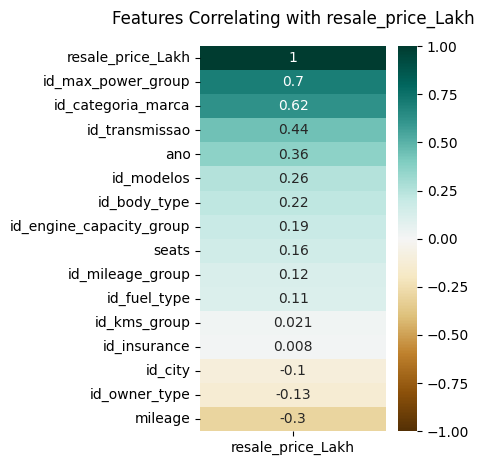

In [65]:
#correlation  

# Select columns
columns_of_interest = ['id_mileage_group','id_transmissao', 'id_body_type','id_modelos','id_categoria_marca', 'mileage','ano','id_city','id_insurance','seats','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

In [66]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'mileage': float,
    'id_fuel_type': float,
    'id_categoria_marca': float,
    'id_engine_capacity_group': float,
    'id_kms_group': float,
    'id_max_power_group': float,
    'id_owner_type': float,
    'id_insurance': float,
    'id_city': float,
    'id_modelos': float,
    'id_body_type': float,
    'id_transmissao': float,
    'id_mileage_group': float,
})

In [67]:
#Export
#Not the target
colunas_selecionadas = ['id_body_type','id_categoria_marca','ano','id_city','id_insurance','seats', 'id_mileage_group','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('MileageCenario2.csv', index=False)
   

In [68]:
#Export
#Not the target
colunas_selecionadas = ['mileage_group','id_mileage_group','id_transmissao','transmission_type','body_type','id_body_type','modelo','id_modelos','marca','id_categoria_marca','ano','city','id_city','insurance','id_insurance','seats','engine_capacity','engine_capacity_group','id_engine_capacity_group','fuel_type','id_fuel_type','kms_driven','kms_group','id_kms_group','max_power','max_power_group','id_max_power_group','owner_type','id_owner_type','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('todascenario2Mileage.csv', index=False)

In [69]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)


Data type by column:
full_name                           object
registered_year                     object
engine_capacity                    float64
insurance                           object
transmission_type                   object
kms_driven                         float64
owner_type                          object
fuel_type                           object
max_power                          float64
seats                              float64
mileage                            float64
body_type                   string[python]
city                                object
resale_price_Lakh                  float64
ano                                float64
marca                       string[python]
modelo                      string[python]
mileage_group                     category
max_power_group                   category
kms_group                         category
engine_capacity_group             category
categoria_marca                   category
id_fuel_type                     

In [70]:
# Lista das colunas que você quer converter para string
cols_to_convert = ['max_power_group', 'kms_group', 'engine_capacity_group', 'categoria_marca']

# Convertendo as colunas para o tipo string
df[cols_to_convert] = df[cols_to_convert].astype(str)


In [71]:
# List of columns with matching IDs
cols_to_drop = [
    'full_name',
    'registered_year'
]

# Delete columns that have matching IDs
df = df.drop(columns=cols_to_drop)

In [72]:
print(df)

       engine_capacity      insurance transmission_type  kms_driven  \
0               1199.0    Third Party            Manual     30910.0   
1               1199.0       Zero Dep            Manual     48089.0   
2               1497.0    Third Party            Manual     51000.0   
3               1956.0    Third Party         Automatic     30000.0   
4               1197.0       Zero Dep         Automatic     61113.0   
...                ...            ...               ...         ...   
13951           2199.0    Third Party         Automatic     80000.0   
13952           1197.0    Third Party            Manual     17923.0   
13953           1498.0  Comprehensive            Manual     63389.0   
13954           1248.0  Comprehensive            Manual     40000.0   
13955           1198.0  Comprehensive            Manual     33046.0   

         owner_type fuel_type  max_power  seats  mileage  body_type  ...  \
0       First Owner    Petrol       83.8    5.0    23.84  Hatchback  ..

In [73]:
print(df.columns)

Index(['engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city', 'resale_price_Lakh', 'ano', 'marca', 'modelo', 'mileage_group',
       'max_power_group', 'kms_group', 'engine_capacity_group',
       'categoria_marca', 'id_fuel_type', 'id_categoria_marca',
       'id_engine_capacity_group', 'id_mileage_group', 'id_kms_group',
       'id_max_power_group', 'id_owner_type', 'id_insurance', 'id_city',
       'id_modelos', 'id_body_type', 'id_transmissao'],
      dtype='object')
